Name: Sujal Banset

UNI_ID: 2357525

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# **2 Getting Started with Image Processing with Python.**

**2.1 Exercise - 1:**

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

1. Read and display the image.

• Read the image using the Pillow library and display it.

• You can also use matplotlib to display the image.

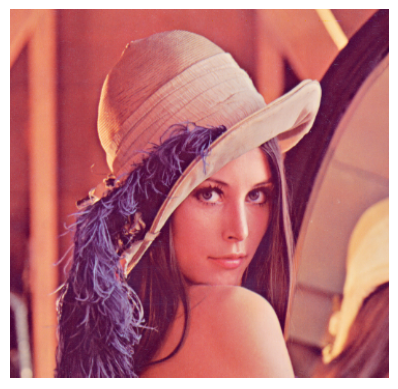

In [5]:
image_colored = Image.open("/content/drive/MyDrive/AI & ML WRK-1/lenna_image.png")
plt.imshow(image_colored)
plt.axis(False)
plt.show()

2. Display only the top left corner of 100x100 pixels.

• Extract the top-left corner of the image (100x100 pixels) and display it using NumPy and
Array Indexing.

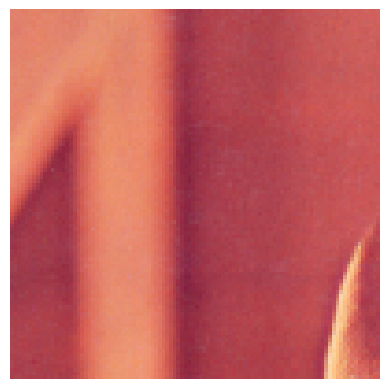

In [6]:
image_array = np.array(image_colored)

# Extract a 100x100 section from the top-left
top_left_section = image_array[:100, :100]

# Display the extracted part
plt.imshow(top_left_section)
plt.axis(False)
plt.show()

3. Show the three color channels (R, G, B).

• Separate the image into its three color channels (Red, Green, and Blue) and display them
individually, labeling each channel as R, G, and B.{Using NumPy.}

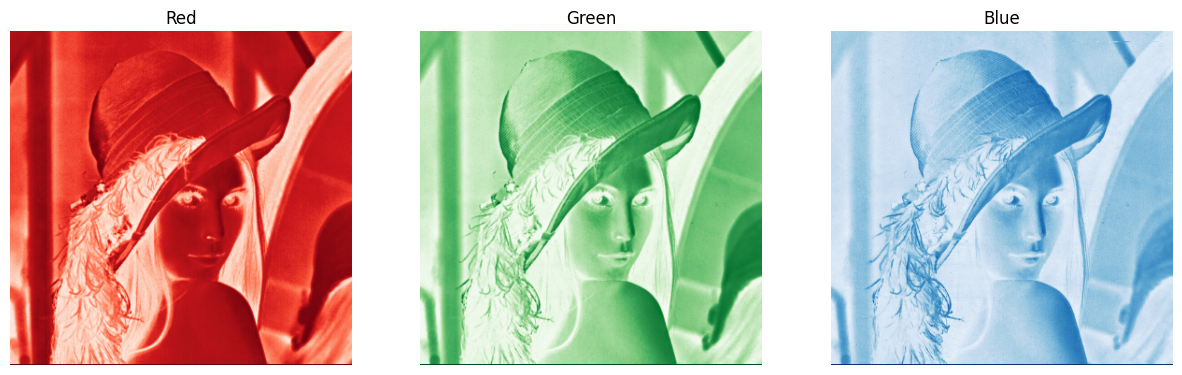

In [7]:
# Convert image to array
image_array = np.array(image_colored)

# Extract color channels
red = image_array[:, :, 0]
green = image_array[:, :, 1]
blue = image_array[:, :, 2]

# Display channels
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

axes[0].imshow(red, cmap="Reds")
axes[0].set_title("Red")

axes[1].imshow(green, cmap="Greens")
axes[1].set_title("Green")

axes[2].imshow(blue, cmap="Blues")
axes[2].set_title("Blue")

for ax in axes:
    ax.axis(False)

plt.show()


4. Modify the top 100 × 100 pixels to a value of 210 and display the resulting image:

• Modify the pixel values of the top-left 100 × 100 region to have a value of 210 (which is a
light gray color), and then display the modified image.

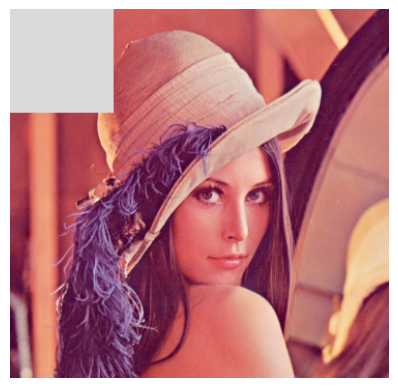

In [9]:
# Modify the top-left 100x100 pixels
image_array[:100, :100] = 210

# Convert array back to image
modified_img = Image.fromarray(image_array)

# Display the modified image
plt.imshow(modified_img)
plt.axis(False)  # Alternative way to turn off axis
plt.show()


**2.2 Exercise - 2:**

1. Load and display a grayscale image.

• Load a grayscale image using the Pillow library.

• Display the grayscale image using matplotlib.

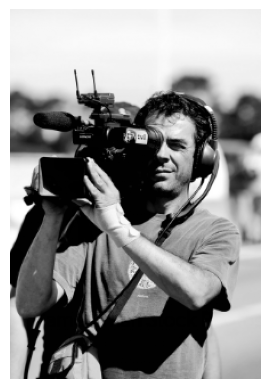

In [10]:
# Open and convert image to grayscale
img_gray = Image.open("/content/drive/MyDrive/AI & ML WRK-1/camera_man.jpg").convert("L")

# Display the grayscale image
plt.imshow(img_gray, cmap="gray")
plt.axis(False)  # Alternative way to turn off axis
plt.show()

2. Extract and display the middle section of the image (150 pixels).

• Extract a 150 pixel section from the center of the image using NumPy array slicing.

• Display this cropped image using matplotlib.

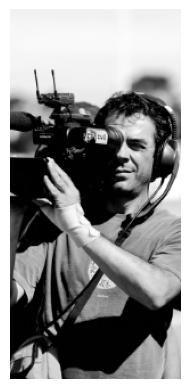

In [11]:
# Convert grayscale image to array
img_array = np.array(img_gray)

# Extract middle section (150 pixels wide)
mid_section = img_array[:, img_array.shape[1]//2 - 75 : img_array.shape[1]//2 + 75]

# Display the extracted section
plt.imshow(mid_section, cmap="gray")
plt.axis(False)
plt.show()

3. Apply a simple threshold to the image (e.g., set all pixel values below 100 to 0).

• Apply a threshold to the grayscale image: set all pixel values below 100 to 0, and all values
above 100 to 255 (creating a binary image).

• Display the resulting binary image.

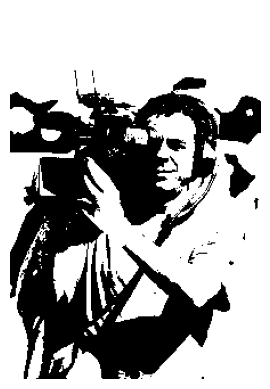

In [12]:
img_binary = np.where(img_array < 100, 0, 255)

# Display the binary image
plt.imshow(img_binary, cmap="gray")
plt.axis(False)
plt.show()

4. Rotate the image 90 degrees clockwise and display the result.

• Rotate the image by 90 degrees clockwise using the Pillow rotate method or by manipulating
the image array.

• Display the rotated image using matplotlib.

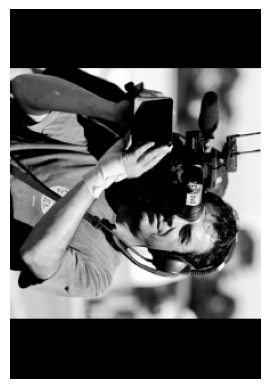

In [13]:
img_rotated = img_gray.rotate(-90)
# Display the rotated image
plt.imshow(img_rotated, cmap="gray")
plt.axis(False)
plt.show()

5. Convert the grayscale image to an RGB image.

• Convert the grayscale image into an RGB image where the grayscale values are replicated
across all three channels (R, G, and B).

• Display the converted RGB image using matplotlib.

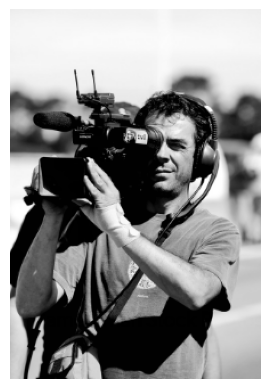

In [14]:
img_rgb = Image.merge("RGB", (img_gray, img_gray, img_gray))
# Display the RGB image
plt.imshow(img_rgb)
plt.axis(False)
plt.show()

# **3 Image Compression and Decompression using PCA.**

1. Load and Prepare Data:

• Fetch an image of you choice.{If colour convert to grayscale}

• Center the dataset - Standaridze the Data.

• Calculate the covaraince matrix of the Standaridze data.

In [15]:
# Open the grayscale image and convert it to an array
img_gray = Image.open("/content/drive/MyDrive/AI & ML WRK-1/lenna_image.png").convert("L")
img_array = np.array(img_gray)

# Calculate the mean and standard deviation across the rows
mean_val = np.mean(img_array, axis=0)
std_val = np.std(img_array, axis=0)

# Standardize the image data
img_standardized = (img_array - mean_val) / std_val


2. Eigen Decomposition and Identifying Principal Components:
• Compute Eigen Values and Eigen Vectors.

• Sort the eigenvalues in descending order and choose the top k eigenvectors corresponding to
the highest eigenvalues.

• Identify the Principal Components with the help of cumulative Sum plot.

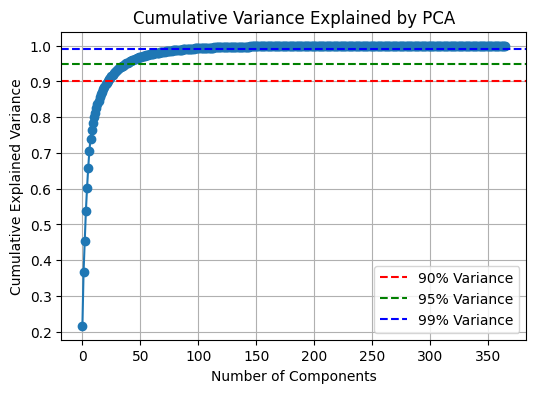

In [16]:
# Compute covariance matrix
cov_matrix = np.cov(img_standardized, rowvar=False)

# Perform eigenvalue decomposition
eigen_vals, eigen_vecs = np.linalg.eigh(cov_matrix)

# Sort eigenvalues and eigenvectors
sorted_idx = np.argsort(eigen_vals)[::-1]
eigen_vals = eigen_vals[sorted_idx]
eigen_vecs = eigen_vecs[:, sorted_idx]

# Calculate explained variance and cumulative variance
explained_var_ratio = eigen_vals / np.sum(eigen_vals)
cumulative_var = np.cumsum(explained_var_ratio)

# Plot the cumulative explained variance
plt.figure(figsize=(6, 4))
plt.plot(cumulative_var, marker='o', linestyle='-')
plt.axhline(y=0.90, color='r', linestyle='--', label="90% Variance")
plt.axhline(y=0.95, color='g', linestyle='--', label="95% Variance")
plt.axhline(y=0.99, color='b', linestyle='--', label="99% Variance")
plt.xlabel("Number of Components")
plt.ylabel("Cumulative Explained Variance")
plt.title("Cumulative Variance Explained by PCA")
plt.legend()
plt.grid(True)
plt.show()

3. Reconstruction and Experiment:

• Reconstruction: Transform the original data by multiplying it with the selected eigenvec-
tors(PCs) to obtain a lower-dimensional representation.

• Experiments: Pick Four different combination of principal components with various ex-
plained variance value and compare the result.

• Display the Results and Evaluate.

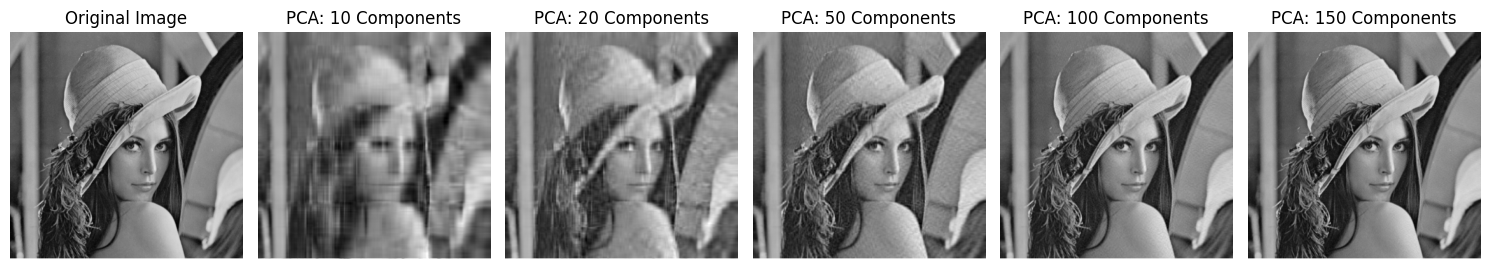

In [17]:
# Function to reconstruct image using PCA components
def reconstruct_pca(img_data, eigen_vecs, num_components):
    selected_vecs = eigen_vecs[:, :num_components]
    compressed_img = np.dot(img_data, selected_vecs)
    restored_img = np.dot(compressed_img, selected_vecs.T)
    return (restored_img * std_val) + mean_val

# List of number of components to test
components_list = [0, 10, 20, 50, 100, 150]

# Set up the plot for comparison
fig, ax = plt.subplots(1, len(components_list), figsize=(15, 6))

for i, n in enumerate(components_list):
    if n == 0:
        ax[i].imshow(img_array, cmap="gray")
        ax[i].set_title("Original Image")
    else:
        reconstructed_img = reconstruct_pca(img_standardized, eigen_vecs, n)
        ax[i].imshow(np.clip(reconstructed_img, 0, 255), cmap="gray")
        ax[i].set_title(f"PCA: {n} Components")

    ax[i].axis("off")

plt.tight_layout()
plt.show()